# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

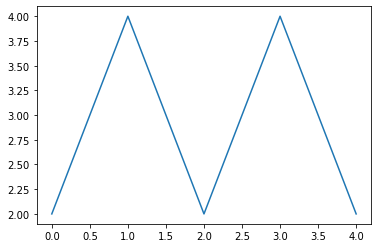

In [30]:
# vector를 넣을 경우, 인덱스가 x축에 존재하고, y축에 값이 대입된다.
plt.plot([2, 4, 2, 4, 2])

plt.show() # matplotlib inline 명령어를 써줬기 때문에 쓰지 않아도 된다.

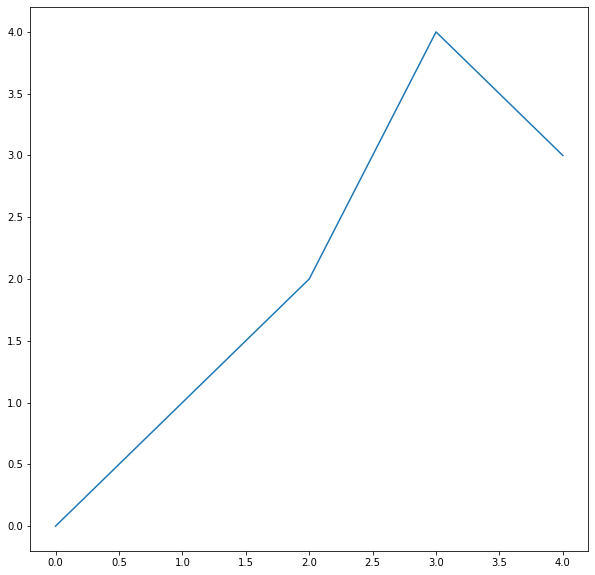

In [35]:
plt.figure(figsize=(10,10)) # plotting 도면 선언. 먼저 원하는 크기의 도화지를 준비한다.
plt.plot([0,1,2,4,3])
plt.show()

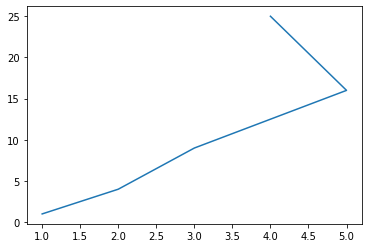

In [38]:
#정의역과 치역
x = np.array([1,2,3,5,4])
y = np.array([1,4, 9, 16, 25])

plt.plot(x, y)
plt.show()

그래프의 형태로 보아 정의역과 치역이 쌍을 이루고 앞의 인덱스부터 점을찍고 선으로 이어가는 방식인 것 같다.

## II. Matplotlib Case Study

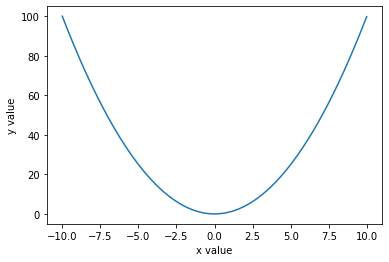

In [40]:
x = np.arange(-10, 10, 0.01)
₩
plt.xlabel("x value")
plt.ylabel("y value")

plt.plot(x, x**2)
plt.show()

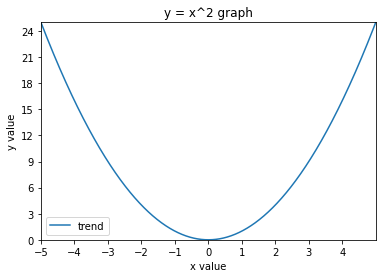

In [46]:
plt.xlabel("x value")
plt.ylabel("y value")

# 출력 범위 설정, [x_min, x_max, y_min, y_max]
plt.axis([-5, 5, 0, 25])

# 눈금 표시
plt.xticks([i for i in range(-5, 5, 1)])
plt.yticks([i for i in range(0, 27, 3)])

# title 표시
plt.title("y = x^2 graph")

plt.plot(x, x**2, label='trend')
plt.legend() #legend는 항상 plot함수 뒤에 둬야한다.
plt.show()

## III. Matplotlib Case Study

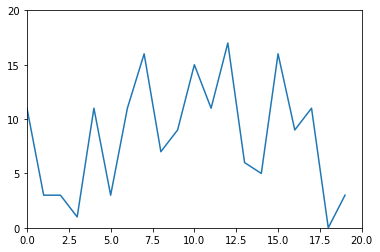

In [60]:
x = np.arange(20)
y = np.random.randint(0, 20, 20)

plt.axis([0, 20, 0, 20])
plt.yticks([i for i in range(0,21, 5)])

plt.plot(x, y)
plt.show()

### Scatter Plot

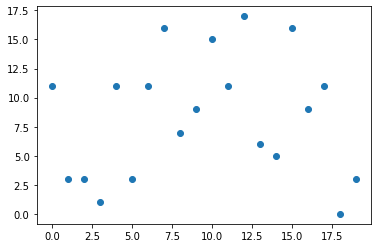

In [61]:
# plot은 선그래프(시계열 데이터에서 많이 쓰인다), scatter는 산점도(분포도에서 많이 이용) 
plt.scatter(x, y)
plt.show()

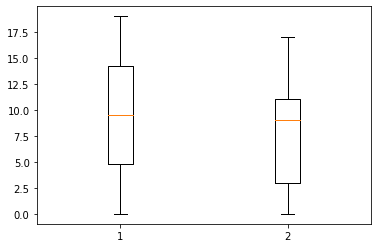

In [63]:
# 맨 아래와 맨 위는 최솟값, 최댓값을 뜻하고
# 내부 박스 아래쪽은 전체의 25% 순위에 해당하는 값이고, 연두선은 중앙값(50%), 박스 위쪽은 전체의 75% 순위에 해당하는 값이다
plt.boxplot(y)
plt.show()

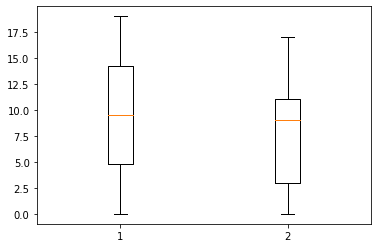

In [65]:
plt.boxplot((x,y))
plt.show()

막대 그래프

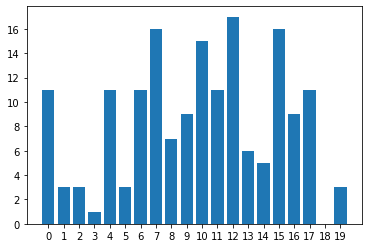

In [67]:
plt.bar(x, y)
plt.xticks(x)
plt.show()

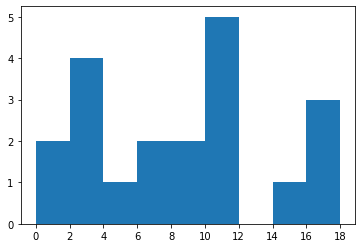

In [70]:
# histogram은 각 값들이 몇번씩 나왔는지 집계하여 시각화한다.
plt.hist(y, bins=np.arange(0, 20, 2))
plt.xticks(np.arange(0, 20, 2))
plt.show()

원형 그래프: 비율 확인에 용이하다

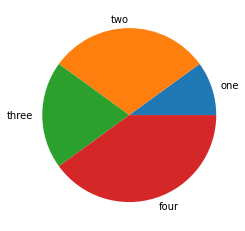

In [72]:
z = [100, 300, 200, 400]
plt.pie(z, labels=['one','two','three','four'])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

In [73]:
import seaborn as sns

커널 밀도 그림

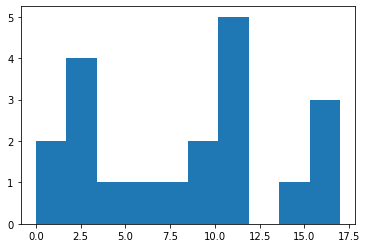

In [76]:
plt.hist(y)
plt.show()

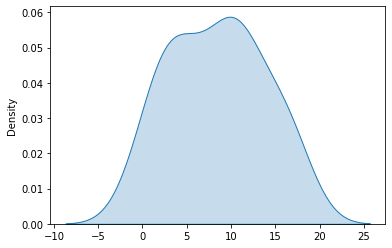

In [78]:
sns.kdeplot(y, shade=True)
plt.show()

Count Plot: 범주형 칼럼 빈도수 시각화 -> groupby 후의 도수를 하는 것과 동일한 효과

In [79]:
vote_df = pd.DataFrame({"name":['Andy','Bob','Cat'], "vote":[True, True, False]})
vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [83]:
vote_count = vote_df.groupby('vote').count()
vote_count

,name
vote,
False,1
True,2


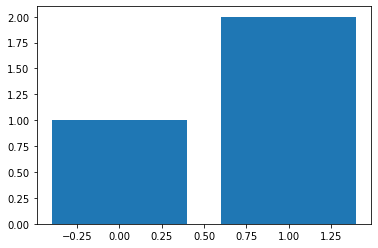

In [85]:
plt.bar(x=[False, True], height=vote_count['name'])
plt.show()

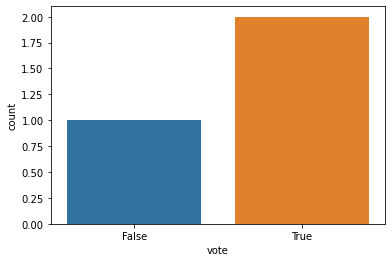

In [86]:
sns.countplot(x=vote_df['vote'])
plt.show()

Cat Plot: 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수

In [87]:
covid = pd.read_csv('~/Jupyter workspace/archive/country_wise_latest.csv')
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


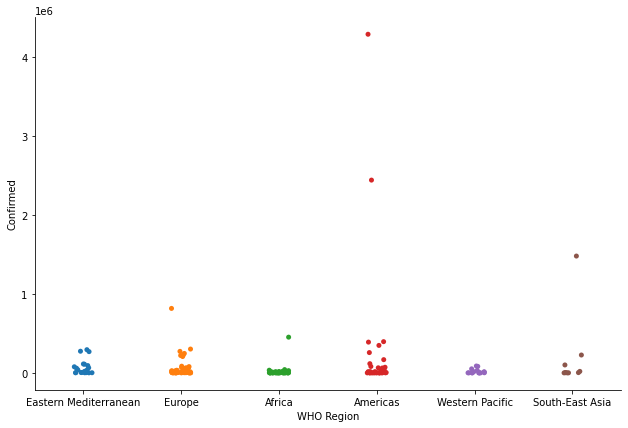

In [90]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid)
s.fig.set_size_inches(10, 6)
plt.show()

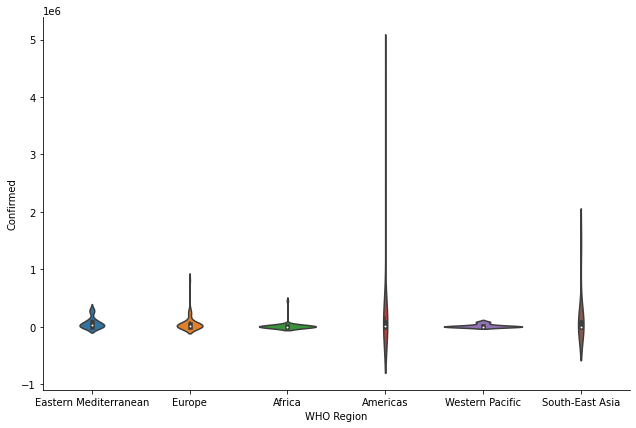

In [91]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid, kind='violin')
s.fig.set_size_inches(10, 6)
plt.show()

Strip Plot: scatter plot과 유사하다

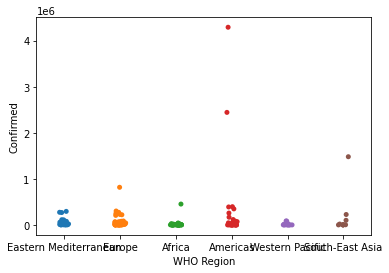

In [96]:
sns.stripplot(x='WHO Region' , y='Confirmed' , data = covid)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

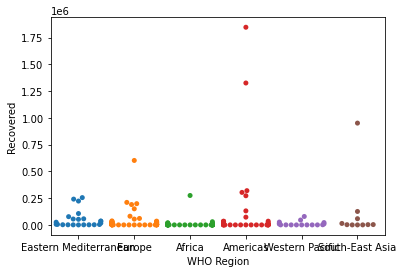

In [97]:
sns.swarmplot(x='WHO Region', y='Recovered', data = covid)
plt.show()

Heatmap

In [101]:
# corr는 각 칼럼 간의 상관관계 정도를 나타낸다.
covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


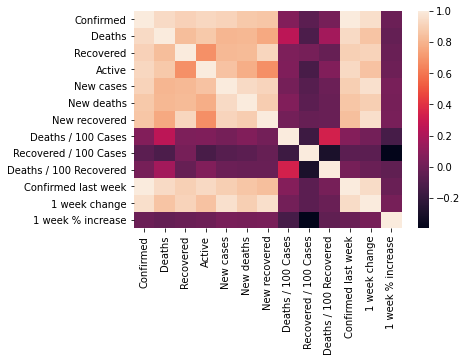

In [102]:
sns.heatmap(covid.corr())
plt.show()

## Mission:

### 